In [1]:
import pandas as pd
url = "C:/Users/Akhil Jalla/Desktop/Final Project/Final_part1.csv"
names = ['ROI', 'Foreground Blur Score', 'Background blur score', 'Brightness Score', 'Noise score', 'Simplicity score', 'Contrast score','Area Ratio','Rule of third score','Potrait mode','Landscape Mode','Output']
features = pd.read_csv(url, skiprows=1, names=names)

In [2]:
print(features.head(5))

   ROI  Foreground Blur Score  Background blur score  Brightness Score  \
0    1             816.753390             632.191895         94.225197   
1    1            1349.136240            2966.791954         52.315076   
2    1            1490.677094             695.151423         76.449824   
3    1             634.668559            2980.980330        138.772645   
4    1             667.834364            2127.194413        164.772907   

   Noise score  Simplicity score  Contrast score  Area Ratio  \
0     0.876805         28.390367       56.670795    0.365508   
1     0.837461         84.586965       47.037664    0.307666   
2     3.563156         25.111986       74.842004    0.000169   
3     1.527901         40.185455       49.985678    0.689319   
4     5.624256         31.891725       68.586146    0.010376   

   Rule of third score  Potrait mode  Landscape Mode  Output  
0             0.016244             0               1       1  
1             0.014584             0        

In [3]:
print(features.shape)

(1600, 12)


In [4]:
print(features.describe())

               ROI  Foreground Blur Score  Background blur score  \
count  1600.000000            1600.000000            1600.000000   
mean      0.989375            1067.985548             994.336216   
std       0.102561             802.337681            1142.867192   
min       0.000000               0.000000               0.000000   
25%       1.000000             614.679818             404.145307   
50%       1.000000             917.389509             707.511961   
75%       1.000000            1337.966656            1241.471173   
max       1.000000           12008.554350           17149.312060   

       Brightness Score  Noise score  Simplicity score  Contrast score  \
count       1600.000000  1600.000000       1600.000000     1600.000000   
mean         117.280160     2.072803         35.800236       58.847659   
std           43.768638     1.778285         18.518702       17.606168   
min            0.000000     0.000000          0.000000        0.000000   
25%           87.

In [5]:
import numpy as np

In [6]:
labels = np.array(features['Output'])

In [7]:
print(labels)

[1 0 0 ... 1 0 1]


In [8]:
features= features.drop('Output', axis = 1)

In [9]:
print(features.columns)

Index(['ROI', 'Foreground Blur Score', 'Background blur score',
       'Brightness Score', 'Noise score', 'Simplicity score', 'Contrast score',
       'Area Ratio', 'Rule of third score', 'Potrait mode', 'Landscape Mode'],
      dtype='object')


In [10]:
feature_list = list(features.columns)

In [11]:
features1 = np.array(features)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [14]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1280, 11)
Training Labels Shape: (1280,)
Testing Features Shape: (320, 11)
Testing Labels Shape: (320,)


In [33]:

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_features,train_labels)

y_pred=clf.predict(test_features)

In [34]:
print(clf.score(test_features,test_labels))


0.865625


In [35]:
from sklearn import metrics

feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)

print(feature_imp)


Brightness Score         0.244292
Noise score              0.156212
Background blur score    0.132846
Area Ratio               0.124474
Foreground Blur Score    0.086593
Rule of third score      0.085177
Simplicity score         0.071347
Contrast score           0.055909
Potrait mode             0.029101
Landscape Mode           0.014051
ROI                      0.000000
dtype: float64


In [36]:
for feature in zip(feature_list, clf.feature_importances_):
    print(feature)

('ROI', 0.0)
('Foreground Blur Score', 0.0865929227281099)
('Background blur score', 0.1328457939368976)
('Brightness Score', 0.24429171002848307)
('Noise score', 0.15621158146232753)
('Simplicity score', 0.07134680921967773)
('Contrast score', 0.05590889360251518)
('Area Ratio', 0.12447408213790374)
('Rule of third score', 0.08517671424422632)
('Potrait mode', 0.029100976428689047)
('Landscape Mode', 0.01405051621116991)


In [37]:
from sklearn.metrics import log_loss
# clf_probs = clf.predict_proba(test_features)
# score = log_loss(test_labels, clf_probs)
# print(score)
# probs = clf.predict_proba(test_features)
# keep the predictions for class 1 only
# probs = probs[:, 1]
# # calculate log loss
# loss = log_loss(test_labels, probs)
# print(loss)
y_pred_prob = clf.predict_proba(test_features)[:, 1]
# from sklearn.preprocessing import binarize
# y_pred_class = binarize(y_pred_prob, 0.3)[0]
# loss = log_loss(y_pred_class, y_pred_prob)
# print(loss)
from sklearn.metrics import cohen_kappa_score
yhat_classes = clf.predict(test_features)
kappa = cohen_kappa_score(test_labels, yhat_classes)
print('Cohens kappa: %f' % kappa)
# auc = roc_auc_score(test_labels, yhat_classes)
# print('ROC AUC: %f' % auc)
# from sklearn.metrics import matthews_corrcoef
# print(matthews_corrcoef(test_labels, yhat_classes))
from sklearn.metrics import brier_score_loss
y_preds = clf.predict_proba(test_features)
preds = y_preds[:,1]
clf_score = brier_score_loss(test_labels, preds, pos_label=1)
print(clf_score)

Cohens kappa: 0.731250
0.10303124999999999


No handles with labels found to put in legend.


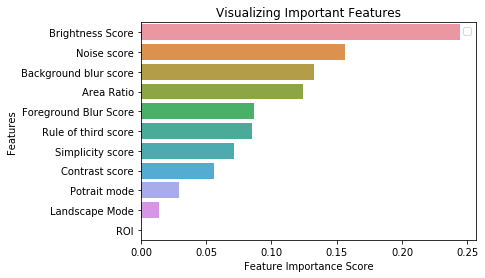

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [45]:
from sklearn import metrics
print(metrics.accuracy_score(test_labels, y_pred))

def f1 (precision, recall):
    return  2 * ((precision * recall)/ (precision + recall))

print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
print("Precision:",metrics.precision_score(test_labels, y_pred))
print("Recall:",metrics.recall_score(test_labels, y_pred))
print("F1 score:",f1(metrics.precision_score(test_labels, y_pred),metrics.recall_score(test_labels, y_pred)))

0.865625
Accuracy: 0.865625
Precision: 0.8726114649681529
Recall: 0.85625
F1 score: 0.8643533123028391


[[140  20]
 [ 23 137]]


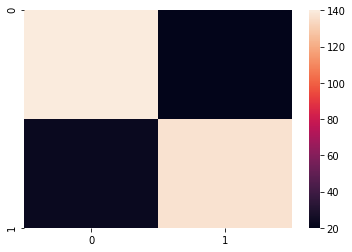

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

conf_mat = confusion_matrix(test_labels, y_pred)
print(conf_mat)
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

<Figure size 1440x1440 with 0 Axes>

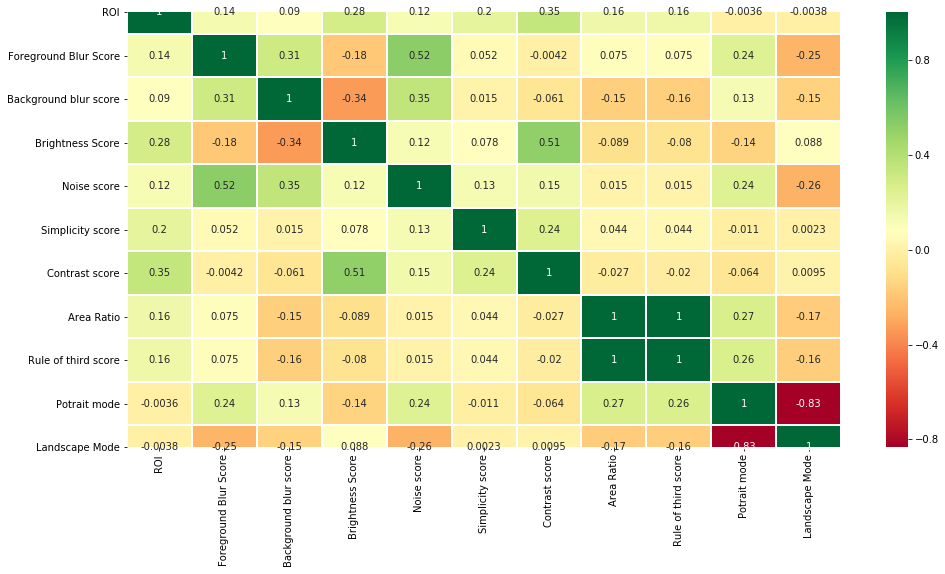

In [44]:
#get correlations of each features in dataset
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
plt.figure(figsize = (16,8))
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="RdYlGn",linewidths=-1.0)
plt.show()

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
probs = clf.predict_proba(test_features)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print(auc)

0.92783203125


In [47]:
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plot_roc_curve(fpr, tpr)


In [97]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()

clf1 = clf1.fit(train_features,train_labels)


In [98]:
y_pred = clf1.predict(test_features)

In [99]:
print(clf1.score(test_features,test_labels))

0.865625


In [111]:
from sklearn.tree import export_graphviz
import os
estimator = clf.estimators_[1]
export_graphviz(estimator,out_file='tree.dot',feature_names = features.columns,class_names = 'Output',
                rounded = True, proportion = False, 
                precision = 2, filled = True)
os.system('dot -Tpng tree.dot -o tree.png')

0